In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os

folder = '.'
file_names = glob(os.path.join(folder, '*/*.xlsx'))
file_name = file_names[0]

print(file_name)
data_all = pd.read_excel(file_name)
print(data_all.head())

./자동측정망_팔당상수원보호구역_시간자료2018/경안천2018.xlsx
             측정날짜  수계 측정소명      MSR_DATE_R    총유기탄소  염화메틸렌  독성도(발광박테리아)  \
0  20180101000000  한강  경안천  20180101000000  2.38667    0.0          NaN   
1  20180101010000  한강  경안천  20180101010000  2.40667    0.0          NaN   
2  20180101020000  한강  경안천  20180101020000  2.38000    0.0          NaN   
3  20180101030000  한강  경안천  20180101030000  2.38333    0.0          NaN   
4  20180101040000  한강  경안천  20180101040000  2.42167    0.0          NaN   

   1.1.1-트리클로로에테인   벤젠  사염화탄소  ...  수소이온농도  전기전도도  용존산소  독성지수(좌)  유영속도(좌)  \
0             0.0  0.0    0.0  ...     NaN    NaN   NaN      1.0  0.55750   
1             0.0  0.0    0.0  ...     NaN    NaN   NaN      0.0  0.53583   
2             0.0  0.0    0.0  ...     NaN    NaN   NaN      0.0  0.55917   
3             0.0  0.0    0.0  ...     NaN    NaN   NaN      0.0  0.57083   
4             0.0  0.0    0.0  ...     NaN    NaN   NaN      0.0  0.58000   

   개체수(좌)  독성지수(우)  유영속도(우)  개체수(우)  탁도  
0   

# markdown test

In [2]:
data_all.head()

,측정날짜,수계,측정소명,MSR_DATE_R,총유기탄소,염화메틸렌,독성도(발광박테리아),1.1.1-트리클로로에테인,벤젠,사염화탄소,...,수소이온농도,전기전도도,용존산소,독성지수(좌),유영속도(좌),개체수(좌),독성지수(우),유영속도(우),개체수(우),탁도
0,20180101000000,한강,경안천,20180101000000,2.38667,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,0.55750,14.0,0.0,0.58917,15.0,NaN
1,20180101010000,한강,경안천,20180101010000,2.40667,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.53583,14.0,0.0,0.59083,15.0,NaN
2,20180101020000,한강,경안천,20180101020000,2.38000,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.55917,14.0,0.0,0.57167,15.0,NaN
3,20180101030000,한강,경안천,20180101030000,2.38333,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.57083,14.0,0.0,0.58583,15.0,NaN
4,20180101040000,한강,경안천,20180101040000,2.42167,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.58000,14.0,0.0,0.57167,15.0,NaN


In [95]:
data_all.index

RangeIndex(start=0, stop=8739, step=1)

In [96]:
data_all.columns

Index(['측정날짜', '수계', '측정소명', 'MSR_DATE_R', '총유기탄소', '염화메틸렌', '독성도(발광박테리아)',
       '1.1.1-트리클로로에테인', '벤젠', '사염화탄소', '트리클로로에틸렌', '톨루엔', '테트라클로로에틸렌', '에틸벤젠',
       'm,p-자일렌', 'o-자일렌', '[ECD]염화메틸렌', '[ECD]1.1.1-트리클로로에테인', '[ECD]사염화탄소',
       '[ECD]트리클로로에틸렌', '[ECD]테트라클로로에틸렌', '클로로필-a', '수온', '수소이온농도', '전기전도도',
       '용존산소', '독성지수(좌)', '유영속도(좌)', '개체수(좌)', '독성지수(우)', '유영속도(우)', '개체수(우)',
       '탁도'],
      dtype='object')

In [97]:
data_all.values

array([[20180101000000, '한강', '경안천', ..., 0.58917, 15.0, nan],
       [20180101010000, '한강', '경안천', ..., 0.59083, 15.0, nan],
       [20180101020000, '한강', '경안천', ..., 0.57167, 15.0, nan],
       ...,
       [20181231210000, '한강', '경안천', ..., 0.40833, 13.16667, 0.9],
       [20181231220000, '한강', '경안천', ..., 0.42167, 12.5, nan],
       [20181231230000, '한강', '경안천', ..., 0.41167, 12.75, nan]],
      dtype=object)

In [98]:
data_all.iloc[:,4]

0       2.38667
1       2.40667
2       2.38000
3       2.38333
4       2.42167
         ...   
8734    2.33000
8735    2.38250
8736    2.42667
8737    2.44333
8738    2.51500
Name: 총유기탄소, Length: 8739, dtype: float64

In [8]:
type(data_all.iloc[:,4])

pandas.core.series.Series

In [118]:
toc = data_all.iloc[:,4]
toc

0       2.38667
1           NaN
2       2.38000
3       2.38333
4       2.42167
         ...   
8734    2.33000
8735    2.38250
8736    2.42667
8737    2.44333
8738    2.51500
Name: 총유기탄소, Length: 8739, dtype: float64

In [124]:
is_nan = toc.isna()
is_nan

0       False
1        True
2       False
3       False
4       False
        ...  
8734    False
8735    False
8736    False
8737    False
8738    False
Name: 총유기탄소, Length: 8739, dtype: bool

In [110]:
toc[is_nan]

1      NaN
40     NaN
62     NaN
63     NaN
64     NaN
        ..
8608   NaN
8609   NaN
8639   NaN
8729   NaN
1      NaN
Name: 총유기탄소, Length: 697, dtype: float64

In [21]:
toc.shift(-1)

0       2.40667
1       2.38000
2       2.38333
3       2.42167
4       2.41500
         ...   
8734    2.38250
8735    2.42667
8736    2.44333
8737    2.51500
8738        NaN
Name: 총유기탄소, Length: 8739, dtype: float64

In [48]:
is_valid_up = ~toc.shift().isna()
is_valid_up

0       False
1        True
2        True
3        True
4        True
        ...  
8734     True
8735     True
8736     True
8737     True
8738     True
Name: 총유기탄소, Length: 8739, dtype: bool

In [37]:
is_valid_down = ~toc.shift(-1).isna()
is_valid_down

0        True
1        True
2        True
3        True
4        True
        ...  
8734     True
8735     True
8736     True
8737     True
8738    False
Name: 총유기탄소, Length: 8739, dtype: bool

In [61]:
len(toc[is_nan])

695

In [62]:
len(toc[is_nan & is_valid_up & is_valid_down])

39

In [132]:
cum = toc.notnull().astype(int).cumsum()
cum

0          1
1          1
2          2
3          3
4          4
        ... 
8734    8039
8735    8040
8736    8041
8737    8042
8738    8043
Name: 총유기탄소, Length: 8739, dtype: int64

In [134]:
for rows in groupby()

0          1
1          1
2          2
3          3
4          4
        ... 
8734    8039
8735    8040
8736    8041
8737    8042
8738    8043
Name: 총유기탄소, Length: 8739, dtype: int64

In [ ]:
cum[]

In [130]:
cum[is_nan] = np.NaN

In [131]:
cum

0          1.0
1          NaN
2          2.0
3          3.0
4          4.0
         ...  
8734    8039.0
8735    8040.0
8736    8041.0
8737    8042.0
8738    8043.0
Name: 총유기탄소, Length: 8739, dtype: float64

In [71]:
data_all['group']=cum

In [73]:
is_nan

0       False
1       False
2       False
3       False
4       False
        ...  
8734    False
8735    False
8736    False
8737    False
8738    False
Name: 총유기탄소, Length: 8739, dtype: bool

In [76]:
index_nan = is_nan[is_nan].index

In [77]:
index_nan

Int64Index([  40,   62,   63,   64,  106,  107,  182,  183,  226,  227,
            ...
            8441, 8488, 8489, 8557, 8558, 8573, 8608, 8609, 8639, 8729],
           dtype='int64', length=695)

In [79]:
toc.drop(index_nan)

0                                                  2.38667
1                                                  2.40667
2                                                     2.38
3                                                  2.38333
4                                                  2.42167
                               ...                        
8735                                                2.3825
8736                                               2.42667
8737                                               2.44333
8738                                                 2.515
group    0          1
1          2
2          3
3      ...
Name: 총유기탄소, Length: 8045, dtype: object

In [82]:
toc.drop(index_nan)

0       2.38667
1       2.40667
2       2.38000
3       2.38333
4       2.42167
         ...   
8734    2.33000
8735    2.38250
8736    2.42667
8737    2.44333
8738    2.51500
Name: 총유기탄소, Length: 8044, dtype: float64

In [83]:
toc

0       2.38667
1       2.40667
2       2.38000
3       2.38333
4       2.42167
         ...   
8734    2.33000
8735    2.38250
8736    2.42667
8737    2.44333
8738    2.51500
Name: 총유기탄소, Length: 8739, dtype: float64

In [84]:
index_nan

Int64Index([  40,   62,   63,   64,  106,  107,  182,  183,  226,  227,
            ...
            8441, 8488, 8489, 8557, 8558, 8573, 8608, 8609, 8639, 8729],
           dtype='int64', length=695)

In [87]:
toc

0       2.38667
1       2.40667
2       2.38000
3       2.38333
4       2.42167
         ...   
8734    2.33000
8735    2.38250
8736    2.42667
8737    2.44333
8738    2.51500
Name: 총유기탄소, Length: 8739, dtype: float64

In [86]:
toc.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8734    False
8735    False
8736    False
8737    False
8738    False
Name: 총유기탄소, Length: 8739, dtype: bool

In [90]:
toc.drop(toc.index[index_nan], inplace=True)

In [91]:
toc

0       2.38667
1       2.40667
2       2.38000
3       2.38333
4       2.42167
         ...   
8734    2.33000
8735    2.38250
8736    2.42667
8737    2.44333
8738    2.51500
Name: 총유기탄소, Length: 8044, dtype: float64

In [92]:
data_all.drop(index_nan)

,측정날짜,수계,측정소명,MSR_DATE_R,총유기탄소,염화메틸렌,독성도(발광박테리아),1.1.1-트리클로로에테인,벤젠,사염화탄소,...,전기전도도,용존산소,독성지수(좌),유영속도(좌),개체수(좌),독성지수(우),유영속도(우),개체수(우),탁도,group
0,20180101000000,한강,경안천,20180101000000,2.38667,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,1.0,0.55750,14.00000,0.0,0.58917,15.00000,NaN,1
1,20180101010000,한강,경안천,20180101010000,2.40667,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.53583,14.00000,0.0,0.59083,15.00000,NaN,2
2,20180101020000,한강,경안천,20180101020000,2.38000,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.55917,14.00000,0.0,0.57167,15.00000,NaN,3
3,20180101030000,한강,경안천,20180101030000,2.38333,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.57083,14.00000,0.0,0.58583,15.00000,NaN,4
4,20180101040000,한강,경안천,20180101040000,2.42167,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.58000,14.00000,0.0,0.57167,15.00000,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,20181231190000,한강,경안천,20181231190000,2.33000,0.0,-5.90000,0.0,0.0,0.0,...,439.50000,14.05000,0.0,0.39917,9.75000,0.0,0.42833,13.50000,NaN,8040
8735,20181231200000,한강,경안천,20181231200000,2.38250,0.0,-7.61667,0.0,0.0,0.0,...,440.00000,14.15833,0.0,0.40583,10.08333,0.0,0.41250,13.33333,0.9,8041
8736,20181231210000,한강,경안천,20181231210000,2.42667,0.0,-5.28833,0.0,0.0,0.0,...,440.66667,14.30000,0.0,0.39333,9.66667,0.0,0.40833,13.16667,0.9,8042
8737,20181231220000,한강,경안천,20181231220000,2.44333,0.0,-2.19667,0.0,0.0,0.0,...,441.25000,14.33333,0.0,0.39333,10.25000,0.0,0.42167,12.50000,NaN,8043


In [93]:
len(toc)

8044

In [135]:
a = np.array( [
    [2, 3],
    [4, 5],
    [6, 7]
])

In [136]:
np.transpose(a, (1,0))

array([[2, 4, 6],
       [3, 5, 7]])

In [137]:
data_all

,측정날짜,수계,측정소명,MSR_DATE_R,총유기탄소,염화메틸렌,독성도(발광박테리아),1.1.1-트리클로로에테인,벤젠,사염화탄소,...,수소이온농도,전기전도도,용존산소,독성지수(좌),유영속도(좌),개체수(좌),독성지수(우),유영속도(우),개체수(우),탁도
0,20180101000000,한강,경안천,20180101000000,2.38667,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,0.55750,14.00000,0.0,0.58917,15.00000,NaN
1,20180101010000,한강,경안천,20180101010000,NaN,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.53583,14.00000,0.0,0.59083,15.00000,NaN
2,20180101020000,한강,경안천,20180101020000,2.38000,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.55917,14.00000,0.0,0.57167,15.00000,NaN
3,20180101030000,한강,경안천,20180101030000,2.38333,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.57083,14.00000,0.0,0.58583,15.00000,NaN
4,20180101040000,한강,경안천,20180101040000,2.42167,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.58000,14.00000,0.0,0.57167,15.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,20181231190000,한강,경안천,20181231190000,2.33000,0.0,-5.90000,0.0,0.0,0.0,...,7.5,439.50000,14.05000,0.0,0.39917,9.75000,0.0,0.42833,13.50000,NaN
8735,20181231200000,한강,경안천,20181231200000,2.38250,0.0,-7.61667,0.0,0.0,0.0,...,7.5,440.00000,14.15833,0.0,0.40583,10.08333,0.0,0.41250,13.33333,0.9
8736,20181231210000,한강,경안천,20181231210000,2.42667,0.0,-5.28833,0.0,0.0,0.0,...,7.5,440.66667,14.30000,0.0,0.39333,9.66667,0.0,0.40833,13.16667,0.9
8737,20181231220000,한강,경안천,20181231220000,2.44333,0.0,-2.19667,0.0,0.0,0.0,...,7.5,441.25000,14.33333,0.0,0.39333,10.25000,0.0,0.42167,12.50000,NaN


In [139]:
data_all.isna().sum()

측정날짜                      0
수계                        0
측정소명                      0
MSR_DATE_R                0
총유기탄소                   696
염화메틸렌                  1376
독성도(발광박테리아)            3019
1.1.1-트리클로로에테인         1392
벤젠                     1392
사염화탄소                  1392
트리클로로에틸렌               1392
톨루엔                    1392
테트라클로로에틸렌              1392
에틸벤젠                   1392
m,p-자일렌                1392
o-자일렌                  1392
[ECD]염화메틸렌             1420
[ECD]1.1.1-트리클로로에테인    1396
[ECD]사염화탄소             1396
[ECD]트리클로로에틸렌          1396
[ECD]테트라클로로에틸렌         1396
클로로필-a                 1182
수온                      754
수소이온농도                  754
전기전도도                   755
용존산소                    759
독성지수(좌)                1319
유영속도(좌)                1319
개체수(좌)                 1319
독성지수(우)                1296
유영속도(우)                1296
개체수(우)                 1296
탁도                      761
dtype: int64

In [144]:
data_all.iloc[:,4:6].isnull().any(axis=1).astype('int')

0       0
1       1
2       0
3       0
4       0
       ..
8734    0
8735    0
8736    0
8737    0
8738    0
Length: 8739, dtype: int64

In [151]:
data = data_all.iloc[:, [0,1,4]]

In [152]:
data

,측정날짜,수계,총유기탄소
0,20180101000000,한강,2.38667
1,20180101010000,한강,NaN
2,20180101020000,한강,2.38000
3,20180101030000,한강,2.38333
4,20180101040000,한강,2.42167
...,...,...,...
8734,20181231190000,한강,2.33000
8735,20181231200000,한강,2.38250
8736,20181231210000,한강,2.42667
8737,20181231220000,한강,2.44333


In [157]:
excel_files = []
for i in range(len(file_names)):
    file_name = file_names[i]
    df = pd.read_excel(file_name)
    excel_files.append(df)

0
1
2
3
4
5


In [160]:
df = excel_files[0]
df.columns

Index(['측정날짜', '수계', '측정소명', 'MSR_DATE_R', '총유기탄소', '염화메틸렌', '독성도(발광박테리아)',
       '1.1.1-트리클로로에테인', '벤젠', '사염화탄소', '트리클로로에틸렌', '톨루엔', '테트라클로로에틸렌', '에틸벤젠',
       'm,p-자일렌', 'o-자일렌', '[ECD]염화메틸렌', '[ECD]1.1.1-트리클로로에테인', '[ECD]사염화탄소',
       '[ECD]트리클로로에틸렌', '[ECD]테트라클로로에틸렌', '클로로필-a', '수온', '수소이온농도', '전기전도도',
       '용존산소', '독성지수(좌)', '유영속도(좌)', '개체수(좌)', '독성지수(우)', '유영속도(우)', '개체수(우)',
       '탁도'],
      dtype='object')

In [161]:
df = excel_files[1]
df.columns

Index(['측정날짜', '수계', '측정소명', 'MSR_DATE_R', '총유기탄소', '총질소', '총인', '클로로필-a',
       '수온', '수소이온농도', '전기전도도', '용존산소', '탁도'],
      dtype='object')

In [162]:
df = excel_files[2]
df.columns

Index(['측정날짜', '수계', '측정소명', 'MSR_DATE_R', '총유기탄소', '총질소', '총인', '클로로필-a',
       '수온', '수소이온농도', '전기전도도', '용존산소', '탁도'],
      dtype='object')

In [163]:
df = excel_files[3]
df.columns

Index(['측정날짜', '수계', '측정소명', 'MSR_DATE_R', '총유기탄소', '총질소', '총인', '클로로필-a',
       '수온', '수소이온농도', '전기전도도', '용존산소', '탁도'],
      dtype='object')

In [164]:
df = excel_files[4]
df.columns

Index(['측정날짜', '수계', '측정소명', 'MSR_DATE_R', '총유기탄소', '총질소', '총인', '수온',
       '수소이온농도', '전기전도도', '용존산소', '탁도'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
# Take a dictionary as input to your DataFrame 
my_dict = {"a": ['1.', '3', '1.1', np.nan, '3', '0'], 
           "b": ['1.', '2', '0.1', np.nan, '5', '0'],
           "c": ['2.', '4', '3.3', np.nan, '7', '0']}
df = pd.DataFrame(my_dict)
#display(df)
df

,a,b,c
0,1.,1.,2.
1,3,2,4
2,1.1,0.1,3.3
3,NaN,NaN,NaN
4,3,5,7
5,0,0,0


In [22]:
df.iloc[:, 0:1].dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [26]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [27]:
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [30]:
df.interpolate(method='linear', limit_area='outside', limit_direction='both', axis=0, limit=1)

,a,b,c,d
0,0.0,2.0,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,2.0,4.0,-4.0,16.0


In [62]:
n = len(df) / 3
n

2.0

In [64]:
x = df.to_numpy()
x.shape

(6, 3)

In [68]:
x = x.reshape(-1,6)
x.shape

(3, 6)

In [69]:
x

array([['1', '1', '2', '3', '2', '4'],
       ['1.1', '0.1', '3.3', nan, nan, nan],
       ['3', '5', '7', '0', '0', '0']], dtype=object)

In [17]:
is_nan = df.isna().any(axis=1)
is_nan

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [18]:
is_nan_prev = is_nan.shift(fill_value=True)
is_nan_prev

0     True
1    False
2    False
3    False
4     True
dtype: bool

In [19]:
start_pos = ((is_nan == False) & (is_nan_prev == True)).astype('int')
start_pos

0    1
1    0
2    0
3    0
4    1
dtype: int64

In [53]:
group_id = start_pos.cumsum()
group_id

0    1
1    1
2    1
3    1
4    2
dtype: int64

In [54]:
group_id[is_nan] = None
group_id

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
dtype: float64

In [44]:
a = pd.array([np.nan], dtype=pd.Int64Dtype())
nan_int = a[0]
type(nan_int)

pd.NA

<NA>

In [13]:
g = df.groupby(group_id)

In [14]:
for _, rows in g:
    display(rows)

,a,b,c
0,1,1,2
1,3,2,4
2,1.1,0.1,3.3


,a,b,c
4,3,5,7


In [57]:
import pandas as pd
import numpy as np

dict1 = {"a": ['1', '3', '1.1', np.nan, '3'], 
         "b": ['1', '2', '0.1', np.nan, '5'],
         "c": ['2', '4', '3.3', np.nan, '7']}
df1 = pd.DataFrame(dict1)
dict2 = {"a": ['1', '3', '1.1', np.nan, '3'], 
         "b": ['1', '2', '0.1', np.nan, '5'],
         "d": ['2', '4', '3.3', np.nan, '7']}
df2 = pd.DataFrame(dict2)

df = pd.concat([df1, df2], join='inner', axis=1)
df

,a,b,c,a,b,d
0,1,1,2,1,1,2
1,3,2,4,3,2,4
2,1.1,0.1,3.3,1.1,0.1,3.3
3,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5,7,3,5,7


In [8]:
import pandas as pd
import numpy as np

dict1 = {"a": ['1', '3', '1.1', np.nan, '3'], 
        }
df = pd.DataFrame(dict1)

In [4]:
df



,a
0,1
1,3
2,1.1
3,NaN
4,3


In [10]:
a = np.array([0.1, 0.2])
df = pd.DataFrame(a)

In [11]:
df


,0
0,0.1
1,0.2


In [50]:
x = np.linspace(-1, 1, 100)
y = x**2

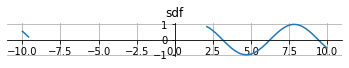

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')
ax.grid(True, which='both')
# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('sdf')
plt.show()

In [98]:
df = pd.DataFrame(y)
df[0][30:60] = np.nan

dfnew = df.interpolate()

z = dfnew[0].to_numpy()
z 

array([ 0.54402111,  0.36459873,  0.17034683, -0.03083368, -0.23076008,
       -0.42130064, -0.59470541, -0.74392141, -0.86287948, -0.94674118,
       -0.99209556, -0.99709789, -0.96154471, -0.8868821 , -0.77614685,
       -0.63384295, -0.46575841, -0.27872982, -0.0803643 ,  0.12126992,
        0.31797166,  0.50174037,  0.66510151,  0.80141062,  0.90512352,
        0.97202182,  0.99938456,  0.98609877,  0.93270486,  0.84137452,
        0.84172719,  0.84207985,  0.84243251,  0.84278518,  0.84313784,
        0.84349051,  0.84384317,  0.84419584,  0.8445485 ,  0.84490117,
        0.84525383,  0.84560649,  0.84595916,  0.84631182,  0.84666449,
        0.84701715,  0.84736982,  0.84772248,  0.84807514,  0.84842781,
        0.84878047,  0.84913314,  0.8494858 ,  0.84983847,  0.85019113,
        0.8505438 ,  0.85089646,  0.85124912,  0.85160179,  0.85195445,
        0.85230712,  0.73002623,  0.57805259,  0.40256749,  0.21070855,
        0.01027934, -0.19056796, -0.38366419, -0.56115544, -0.71

In [71]:
z = dfnew[0].to_numpy()
z 

array([1.00000000e+00, 9.60004081e-01, 9.20824406e-01, 8.93480257e-01,
       8.66136109e-01, 8.38791960e-01, 8.11447811e-01, 7.84103663e-01,
       7.56759514e-01, 7.29415366e-01, 7.02071217e-01, 6.74727069e-01,
       6.47382920e-01, 6.20038772e-01, 5.92694623e-01, 5.65350474e-01,
       5.38006326e-01, 5.10662177e-01, 4.83318029e-01, 4.55973880e-01,
       4.28629732e-01, 4.01285583e-01, 3.73941435e-01, 3.46597286e-01,
       3.19253137e-01, 2.91908989e-01, 2.64564840e-01, 2.37220692e-01,
       2.09876543e-01, 1.82532395e-01, 1.55188246e-01, 1.39679625e-01,
       1.24987246e-01, 1.11111111e-01, 9.80512193e-02, 8.58075707e-02,
       7.43801653e-02, 6.37690032e-02, 5.39740843e-02, 4.49954086e-02,
       3.68329762e-02, 2.94867871e-02, 2.29568411e-02, 1.72431385e-02,
       1.23456790e-02, 8.26446281e-03, 4.99948985e-03, 2.55076013e-03,
       9.18273646e-04, 1.02030405e-04, 1.02030405e-04, 9.18273646e-04,
       2.55076013e-03, 4.99948985e-03, 8.26446281e-03, 1.23456790e-02,
      

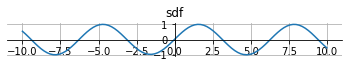

In [108]:
fig, ax = plt.subplots()
ax.plot(x, z)
ax.set_aspect('equal')
ax.grid(True, which='both')
# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.title('sdf')
plt.show()

In [107]:
#dfnew = df.interpolate(method='cubic')
#dfnew = df.interpolate(method='quadratic')
dfnew = df.interpolate(method='polynomial', order=9)

z = dfnew[0].to_numpy()
z 

array([ 0.54402111,  0.36459873,  0.17034683, -0.03083368, -0.23076008,
       -0.42130064, -0.59470541, -0.74392141, -0.86287948, -0.94674118,
       -0.99209556, -0.99709789, -0.96154471, -0.8868821 , -0.77614685,
       -0.63384295, -0.46575841, -0.27872982, -0.0803643 ,  0.12126992,
        0.31797166,  0.50174037,  0.66510151,  0.80141062,  0.90512352,
        0.97202182,  0.99938456,  0.98609877,  0.93270486,  0.84137452,
        0.71585293,  0.56133598,  0.38425589,  0.19199424, -0.0074511 ,
       -0.2058214 , -0.39495478, -0.56712906, -0.71537577, -0.83375388,
       -0.91757489, -0.9635729 , -0.97001599, -0.93675707, -0.8652245 ,
       -0.75835454, -0.62046916, -0.45710436, -0.27479529, -0.08082567,
        0.11705025,  0.31090394,  0.49293751,  0.65578712,  0.79281458,
        0.89837677,  0.96806259,  0.99888749,  0.98943593,  0.93994302,
        0.85230712,  0.73002623,  0.57805259,  0.40256749,  0.21070855,
        0.01027934, -0.19056796, -0.38366419, -0.56115544, -0.71

In [97]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
z = y

## fill demo

https://stackoverflow.com/questions/30533021/interpolate-or-extrapolate-only-small-gaps-in-pandas-dataframe

In [46]:
M = 10;
N = 5;
c = 15;
A = np.random.randn(M,N)

mask=np.zeros(M*N,dtype=bool)
mask[:c] = True
np.random.shuffle(mask)
mask=mask.reshape(M,N)

A[mask] = np.nan
A

array([[-0.62398768,  0.56693047, -0.27090163,  1.61645051, -0.63549526],
       [-0.24216098, -0.50697813, -0.09618979,         nan, -1.29713434],
       [        nan,  0.99620312,         nan,  0.35587795, -0.08181704],
       [        nan,         nan, -0.95259695,  0.00495302,         nan],
       [-0.89926671,         nan,  0.56682653, -0.49263696,  1.23505293],
       [ 0.92983695,  1.2322332 ,         nan,         nan, -1.64018048],
       [        nan, -0.55489046,         nan, -0.9129814 , -0.77827533],
       [-0.16729293,         nan,         nan,  0.15204916, -1.09290465],
       [        nan,  0.39105357, -0.14873924, -0.16152275, -0.77414844],
       [-0.80795982, -2.14130289,  0.77302778,  0.9317743 ,         nan]])

In [47]:
data = pd.DataFrame(A)
data.columns = ['a', 'b', 'c', 'd', 'e']
data

,a,b,c,d,e
0,-0.623988,0.566930,-0.270902,1.616451,-0.635495
1,-0.242161,-0.506978,-0.096190,NaN,-1.297134
2,NaN,0.996203,NaN,0.355878,-0.081817
3,NaN,NaN,-0.952597,0.004953,NaN
4,-0.899267,NaN,0.566827,-0.492637,1.235053
5,0.929837,1.232233,NaN,NaN,-1.640180
6,NaN,-0.554890,NaN,-0.912981,-0.778275
7,-0.167293,NaN,NaN,0.152049,-1.092905
8,NaN,0.391054,-0.148739,-0.161523,-0.774148
9,-0.807960,-2.141303,0.773028,0.931774,NaN


In [30]:
A

array([[        nan, -1.0685737 ,         nan, -2.49872757, -0.24574044],
       [-0.22060129, -0.17299655,         nan,         nan,  1.34058229],
       [ 0.09195907,  0.86104794,         nan,  0.68329715, -0.99344318],
       [ 0.85255667,         nan,         nan, -0.11331177,         nan],
       [ 0.78784238,         nan, -0.78184525, -0.71978336, -0.59823051],
       [        nan,  1.19982139,  1.12630498,  0.2524887 ,  0.22878223],
       [-1.19903326,  0.53151275, -1.2209766 ,  0.52197887,         nan],
       [ 0.43398179,  1.3013297 ,  0.04080883,         nan, -0.86060827],
       [ 2.3932758 ,  0.62501071,         nan,         nan,         nan],
       [-2.78209963, -0.58638129, -0.18880738, -1.76443683,  1.12607407]])

In [48]:
mask = data.copy()
for i in list('abcde'):
    df = pd.DataFrame( data[i] )
    df['new'] = ((df.notnull() != df.shift().notnull()).cumsum())
    df['ones'] = 1
    mask[i] = (df.groupby('new')['ones'].transform('count') < 3) | data[i].notnull()
mask

,a,b,c,d,e
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,False,True,True
6,True,True,False,True,True
7,True,True,False,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [49]:
data.interpolate().bfill()[mask]

,a,b,c,d,e
0,-0.623988,0.566930,-0.270902,1.616451,-0.635495
1,-0.242161,-0.506978,-0.096190,0.986164,-1.297134
2,-0.461196,0.996203,-0.524393,0.355878,-0.081817
3,-0.680231,1.074880,-0.952597,0.004953,0.576618
4,-0.899267,1.153557,0.566827,-0.492637,1.235053
5,0.929837,1.232233,NaN,-0.702809,-1.640180
6,0.381272,-0.554890,NaN,-0.912981,-0.778275
7,-0.167293,-0.081918,NaN,0.152049,-1.092905
8,-0.487626,0.391054,-0.148739,-0.161523,-0.774148
9,-0.807960,-2.141303,0.773028,0.931774,-0.774148


In [110]:
import pandas as pd
import numpy as np
from glob import glob
import os

folder = '.'
file_name = '가평_2019.xlsx'

df = pd.read_excel(file_name)
df

,측정날짜,측정소명,수온,수소이온농도,전기전도도,용존산소,탁도,총유기탄소,총질소,총인,클로로필-a,미생물_독성지수
0,2019.01.01 00:00,가평,2.8,6.8,97.0,12.6,0.5,1.4,1.771,0.004,3.8,4.5
1,2019.01.01 01:00,가평,2.8,6.8,97.0,12.6,0.6,1.4,1.812,0.005,4.1,2.5
2,2019.01.01 02:00,가평,2.8,6.8,97.0,12.6,0.4,1.4,1.765,0.003,3.8,1.0
3,2019.01.01 03:00,가평,2.7,6.8,97.0,12.6,0.5,1.4,1.775,0.005,3.9,1.0
4,2019.01.01 04:00,가평,2.8,6.8,97.0,12.5,0.5,1.4,1.774,0.004,3.9,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019.12.31 19:00,가평,3.6,7.1,115.0,12.6,1.1,1.8,1.718,0.002,22.7,0.1
8756,2019.12.31 20:00,가평,3.5,7.1,115.0,12.6,1.1,1.7,1.726,0.001,21.9,0.5
8757,2019.12.31 21:00,가평,3.4,7.1,115.0,12.6,1.1,1.7,1.738,0.002,21.3,0.9
8758,2019.12.31 22:00,가평,3.4,7.1,115.0,12.6,1.1,1.7,1.723,0.002,21.5,0.7


In [253]:
df6 = df.iloc[:, 2:10]
df6

,수온,수소이온농도,전기전도도,용존산소,탁도,총유기탄소,총질소,총인
0,2.8,6.8,97.0,12.6,0.5,1.4,1.771,0.004
1,2.8,6.8,97.0,12.6,0.6,1.4,1.812,0.005
2,2.8,6.8,97.0,12.6,0.4,1.4,1.765,0.003
3,2.7,6.8,97.0,12.6,0.5,1.4,1.775,0.005
4,2.8,6.8,97.0,12.5,0.5,1.4,1.774,0.004
...,...,...,...,...,...,...,...,...
8755,3.6,7.1,115.0,12.6,1.1,1.8,1.718,0.002
8756,3.5,7.1,115.0,12.6,1.1,1.7,1.726,0.001
8757,3.4,7.1,115.0,12.6,1.1,1.7,1.738,0.002
8758,3.4,7.1,115.0,12.6,1.1,1.7,1.723,0.002


In [254]:
is_nan = df6.isna().any(axis=1)

In [255]:
is_nan

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [256]:
is_nan[1048:1049]

1048    True
dtype: bool

In [257]:
is_nan_prev = is_nan.shift(fill_value=True)

In [258]:
is_new = (is_nan == False) & (is_nan_prev == True)

In [259]:
is_new[1048:1049]

1048    False
dtype: bool

In [260]:
cum = is_new.astype(int).cumsum()

In [261]:
cum[is_nan] = np.nan

In [262]:
cum[is_nan]

59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
        ..
8605   NaN
8606   NaN
8607   NaN
8725   NaN
8726   NaN
Length: 2387, dtype: float64

In [263]:
cum[65:179]

65     2.0
66     2.0
67     2.0
68     2.0
69     2.0
      ... 
174    2.0
175    2.0
176    2.0
177    2.0
178    2.0
Length: 114, dtype: float64

In [264]:
group = df6.groupby(cum)

In [265]:
n = 0
minlen = 24*5
print(minlen)
for member in group:
    #print(member)
    #print(len(member[1]))
    cnt = len(member[1])
    if (cnt < minlen):
        continue
    print('cnt = ', cnt, 'data_n =', cnt-minlen+1)
    print(member)
    n += cnt - minlen+1
print('total-cnt = ',n)

120
cnt =  120 data_n = 1
(25.0,        수온  수소이온농도  전기전도도  용존산소   탁도  총유기탄소    총질소     총인
1572  5.4     7.1  121.0  13.0  0.4    1.3  1.813  0.007
1573  5.7     7.2  121.0  13.0  0.4    1.3  1.800  0.008
1574  5.9     7.2  121.0  13.0  0.4    1.2  1.810  0.009
1575  5.9     7.2  121.0  13.0  0.4    1.2  1.791  0.009
1576  5.8     7.2  122.0  13.0  0.4    1.2  1.780  0.007
...   ...     ...    ...   ...  ...    ...    ...    ...
1687  5.6     7.2  124.0  12.4  0.7    1.2  1.885  0.008
1688  5.6     7.2  124.0  12.4  0.8    1.2  1.885  0.007
1689  5.6     7.2  124.0  12.4  0.8    1.3  1.894  0.009
1690  5.6     7.2  124.0  12.4  0.8    1.2  1.875  0.007
1691  5.6     7.2  124.0  12.4  0.8    1.2  1.889  0.008

[120 rows x 8 columns])
cnt =  122 data_n = 3
(68.0,         수온  수소이온농도  전기전도도  용존산소   탁도  총유기탄소    총질소     총인
4429  21.0     6.8   98.0   9.0  1.2    1.8  1.269  0.002
4430  21.7     6.9   99.0   8.9  1.1    1.8  1.252  0.002
4431  22.1     6.8   99.0   8.7  0.9    1.8  1.256  0.0

In [225]:
nan = True

last_i = -1
for i in range(8760):
    if nan and (not is_nan[i]):
        print('i =', i, is_nan[i])
        nan = False
    elif (not nan) and is_nan[i]:
        print('i =', i, is_nan[i], nan)
        nan = True

i = 0 False
i = 59 True False
i = 64 False
i = 179 True False
i = 182 False
i = 230 True False
i = 235 False
i = 325 True False
i = 329 False
i = 422 True False
i = 427 False
i = 441 True False
i = 442 False
i = 443 True False
i = 444 False
i = 447 True False
i = 450 False
i = 493 True False
i = 520 False
i = 535 True False
i = 536 False
i = 539 True False
i = 540 False
i = 541 True False
i = 544 False
i = 545 True False
i = 547 False
i = 548 True False
i = 551 False
i = 553 True False
i = 554 False
i = 558 True False
i = 567 False
i = 586 True False
i = 1053 False
i = 1066 True False
i = 1100 False
i = 1164 True False
i = 1169 False
i = 1215 True False
i = 1218 False
i = 1331 True False
i = 1332 False
i = 1395 True False
i = 1405 False
i = 1498 True False
i = 1500 False
i = 1570 True False
i = 1572 False
i = 1692 True False
i = 1697 False
i = 1765 True False
i = 1767 False
i = 1838 True False
i = 1844 False
i = 1931 True False
i = 1934 False
i = 2005 True False
i = 2009 False
i = 2102

In [266]:
1-(0.99*0.99)

0.01990000000000003

In [267]:
1-(0.999*0.999)

0.001998999999999973

In [268]:
a = np.array( [
    0.1, 0.5, 0.7
])

In [275]:
a[a != 0 ] = 3

In [276]:
a


array([3., 3., 3.])

In [271]:
c = a**2

In [ ]:
 jupyter notebook --ip=0.0.0.0 --no-browser

In [44]:
import pandas as pd
import numpy as np

#dict = {"a": ['1', '3', '1.1', 1, '3'], 
#         "b": ['1', '2', '3.0', 4, '5'],
#         "c": ['2', '4', '3.3', np.nan, '7']}
dict = {"a": [1, 3, 1.1, 1, 3], 
        "b": [1, 2, 3, 4, 5],
       }
df = pd.DataFrame(dict)
df.var(ddof=0)


a    0.9296
b    2.0000
dtype: float64

In [42]:
df.var()

a    1.162
b    0.502
dtype: float64

In [35]:
ds = df.mean()

In [36]:
ds

a    1.82
b    2.80
dtype: float64

In [39]:
df.var()

a    1.162
b    0.000
dtype: float64

In [25]:
a = np.array([1,2,3,4,5])

In [26]:
mean = np.mean(a)

In [27]:
mean

3.0

In [28]:
var = np.var(a)

In [29]:
var

2.0

In [383]:
import pandas as pd
import numpy as np
from glob import glob
import os

folder = '.'
file_name = '가평_2019.xlsx'

df_full = pd.read_excel(file_name)
df_full

,측정날짜,측정소명,수온,수소이온농도,전기전도도,용존산소,탁도,총유기탄소,총질소,총인,클로로필-a,미생물_독성지수
0,2019.01.01 00:00,가평,2.8,6.8,97.0,12.6,0.5,1.4,1.771,0.004,3.8,4.5
1,2019.01.01 01:00,가평,2.8,6.8,97.0,12.6,0.6,1.4,1.812,0.005,4.1,2.5
2,2019.01.01 02:00,가평,2.8,6.8,97.0,12.6,0.4,1.4,1.765,0.003,3.8,1.0
3,2019.01.01 03:00,가평,2.7,6.8,97.0,12.6,0.5,1.4,1.775,0.005,3.9,1.0
4,2019.01.01 04:00,가평,2.8,6.8,97.0,12.5,0.5,1.4,1.774,0.004,3.9,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019.12.31 19:00,가평,3.6,7.1,115.0,12.6,1.1,1.8,1.718,0.002,22.7,0.1
8756,2019.12.31 20:00,가평,3.5,7.1,115.0,12.6,1.1,1.7,1.726,0.001,21.9,0.5
8757,2019.12.31 21:00,가평,3.4,7.1,115.0,12.6,1.1,1.7,1.738,0.002,21.3,0.9
8758,2019.12.31 22:00,가평,3.4,7.1,115.0,12.6,1.1,1.7,1.723,0.002,21.5,0.7


In [384]:
df = df_full.iloc[:, 3:8]
df

,수소이온농도,전기전도도,용존산소,탁도,총유기탄소
0,6.8,97.0,12.6,0.5,1.4
1,6.8,97.0,12.6,0.6,1.4
2,6.8,97.0,12.6,0.4,1.4
3,6.8,97.0,12.6,0.5,1.4
4,6.8,97.0,12.5,0.5,1.4
...,...,...,...,...,...
8755,7.1,115.0,12.6,1.1,1.8
8756,7.1,115.0,12.6,1.1,1.7
8757,7.1,115.0,12.6,1.1,1.7
8758,7.1,115.0,12.6,1.1,1.7


In [380]:
import numpy as np
block = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2],
    [3, 3, 3, 3, 3],
    [np.nan, np.nan, 4, 4, 4],
    [np.nan, np.nan, 5, 5, 5],
    [6, 6, 6, 6, 6],
    [7, 7, 7, 7, 7],
    [8, 8, 8, 8, 8],
    [9, 9, np.nan, np.nan, np.nan],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2],
    [3, 3, 3, 3, 3],
    [4, 4, 4, 4, 4],
    [5, 5, 5, 5, 5],
    [6, 6, 6, 6, 6],
    [7, 7, 7, 7, 7],
    [8, 8, 8, 8, 8],
    [np.nan, np.nan, np.nan, 9, np.nan],
])

In [381]:
n_block = 10
data = block
for i in range(1, n_block):
    data = np.concatenate((data, block))
    #data.append(block)
    #data = np.append(data, block, axis=1)
print(data)

[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [nan nan  4.  4.  4.]
 [nan nan  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9. nan nan nan]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [nan nan nan  9. nan]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [nan nan  4.  4.  4.]
 [nan nan  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9. nan nan nan]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [nan nan nan  9. nan]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  

In [378]:
class MissData(object):
    def __init__(self, load_dir=None):
        if load_dir:
            self.missarr = np.load(os.path.join(load_dir, 'miss.npy'))
            self.idxarr = np.load(os.path.join(load_dir, 'idx.npy'))
    def make_missdata(self, data_x, missrate=0.2):
        data = data_x.copy()
        rows, cols = data_x.shape
        total_no = rows*cols
        total_miss_no = np.round(total_no*missrate).astype(int)
        total_idx = self.idxarr.shape[0]
        idxarr = self.idxarr
        missarr = self.missarr
        #print(total_miss_no)
        miss_no = 0
        cum_no = self.idxarr[:,3:4]
        cum_no = cum_no.reshape((total_idx))
        cum_sum = np.sum(cum_no)
        #print(cum_no)
        #print(total_idx)
        while True:
            loc_count = np.around(np.random.random()*cum_sum)
            #print('loc_count =', loc_count)
            idx = len(cum_no[cum_no <= loc_count])-1
            #print(cum_no[cum_no <= loc_count])
            startnan = idxarr[idx][0]
            nanlen = idxarr[idx][2]
            loc = np.around(np.random.random()*(rows-nanlen)).astype(int)
            #print(loc_count, idx)
            #print(idxarr[idx])
            #data_copy = data[loc:loc+nanlen].copy()
            data_copy = data[loc:loc+nanlen]
            #print('startnan=', startnan)
            #isnan = missarr[startnan:startnan+nanlen].copy()
            isnan = missarr[startnan:startnan+nanlen]
            #print('isnan =',isnan)
            miss_no += idxarr[idx][1]
            if (miss_no > total_miss_no):
                break
            data_copy[isnan==1] = np.nan
            data[loc:loc+nanlen] = data_copy
        #print('miss_data =', data)
        return data
        
    def save(data, max_tseq, save_dir='save'):
        no, dim = data.shape
        #print((no, dim))
        isnan = np.isnan(data).astype(int)
        isany = np.any(isnan, axis=1).astype(int)
        shifted = np.roll(isany, 1)
        shifted[0] = 1
        #print(isnan)
        #print(isany.astype(int))
        #print(shifted)
        startnan = ((isany == 1) & (shifted ==0)).astype(int)
        #print(startnan)
        group = startnan.cumsum()
        group = group*isany
        #print(group)
        n = np.max(group)
        #print(n)
        missarr = None
        cum_no = 0
        rowidx = 0
        for i in range(1, n+1):
            g = (group == i).astype(int)
            i = np.argmax(g)
            rows = g.sum()
            #print(len)
            #print(i)
            #print(type(missarr))
            if rows <= max_tseq:
                nanseq = isnan[i:i+rows, :]
                no = np.sum(nanseq)
                #print(no)
                if missarr is None:
                    missarr = nanseq
                    idxarr = np.array([[rowidx, no, rows, cum_no]])
                else:
                    missarr = np.concatenate((missarr, nanseq))
                    idxarr = np.concatenate((idxarr, [[rowidx, no, rows, cum_no]]), axis=0)
                cum_no += no
                rowidx += rows

        #print(idxarr)
        miss_npy_file = os.path.join(save_dir, 'miss.npy')
        idx_npy_file = os.path.join(save_dir, 'idx.npy')
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        np.save(miss_npy_file, missarr)
        np.save(idx_npy_file, idxarr)
        print('miss_data file saved')


In [386]:
# miss data pattern creation
data = df.to_numpy()

MissData.save(data, max_tseq=100)
print(data.shape)

# create miss data
miss_data = MissData(load_dir='save')
org_data = np.zeros(shape=(100,5))
data_x = miss_data.make_missdata(org_data, missrate=0.2)
data_x

miss_data file saved
(8760, 5)


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  

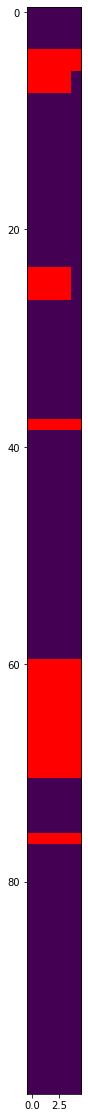

In [387]:
import matplotlib
import matplotlib.pyplot as plt
import copy
current_cmap = copy.copy(matplotlib.cm.get_cmap())
current_cmap.set_bad(color='red')
plt.figure(figsize=(10,20))
plt.imshow(data_x)

In [3]:
#!pip install ipympl

     |████████████████████████████████| 2.0 MB 1.7 MB/s eta 0:00:01


You should consider upgrading via the '/home/kotech/workspace/venv-tensor2n-gpu/bin/python -m pip install --upgrade pip' command.


In [4]:
%matplotlib widget

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(
 "https://raw.githubusercontent.com/plotly/datasets/master/tips.csv"
)# Matplotlib Scatter Plot
plt.scatter('total_bill', 'tip',data=df)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

```
A[i][j] = (B[i][k]*C[k][j] for k in range (n))
```
$$
A = B*C   \\
A_{ij} = \sum_k B_{ik}C_{kj} \\
A_{ij} = \sum_k B_{ik}C_{jk} \\
A_{ij} = \sum_k B_{ik}C^T_{kj} \\
A = B*C^T \\
\sum_k B_{ijk}C_{klm} \equiv A_{ijlm}
$$


$
X_{ijkl}
$

In [30]:
import numpy as np
x = np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
)
y = np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
)
x*y
np.transpose(y)
np.dot(x,np.transpose(y))

y = np.array(
    [
        [1,2,3],
    ]
)
x*y
y = np.array(
    [
        [1],
        [4]
    ]
)
y = np.array(
    [
        [1],
    ]
)
x*y
y = np.array(
    [
        [1,2],
    ]
)
x.shape, y.shape
x = np.random.random((2,3,6))
y = np.random.random((5,3,4))
z = np.tensordot(x,y,axes=[1,1])
z.shape
# (i, j, k)dot(l, k, m) axes=[2,2] = (i, j, l, m)

(2, 6, 5, 4)

In [ ]:

y = np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
)